#### **RF1 - Listagem de todos os times da NBA agrupados por Conferência**

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

eastern_teams = pd.read_csv('../data/processed/eastern_conference_teams.csv')
western_teams = pd.read_csv('../data/processed/western_conference_teams.csv')

print("Times da Conferência Leste:")
display(eastern_teams.head())

print("Times da Conferência Oeste:")
display(western_teams.head())

Times da Conferência Leste:


,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
4,1610612748,Miami Heat,MIA,Heat,Miami,Florida,1988


Times da Conferência Oeste:


,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
1,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
2,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
3,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
4,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967


#### **RF2 - Apresentação da classificação atual dos times [Agrupados por Conferência]**

In [79]:
import os

def load_games_data(data_dir='../data/raw'):
    games_data = []
    for filename in os.listdir(data_dir):
        if filename.endswith('_games.csv'):
            team_name = filename.replace('_games.csv', '').replace('_', ' ')
            team_data = pd.read_csv(os.path.join(data_dir, filename))
            team_data['team_name'] = team_name
            games_data.append(team_data)
    return pd.concat(games_data, ignore_index=True)

games_data = load_games_data()
print("Dados dos jogos carregados:")
display(games_data.head())

def calculate_standings(games_data):
    standings = games_data.groupby('team_name').agg(
        wins=pd.NamedAgg(column='WL', aggfunc=lambda x: (x == 'W').sum()),
        losses=pd.NamedAgg(column='WL', aggfunc=lambda x: (x == 'L').sum())
    ).reset_index()
    standings['win_percentage'] = standings['wins'] / (standings['wins'] + standings['losses'])
    standings = standings.sort_values(by='win_percentage', ascending=False).reset_index(drop=True)
    return standings


standings = calculate_standings(games_data)
print("Classificação dos times:")
display(standings.head())

team_conferences = {
    'Atlanta Hawks': 'East', 'Boston Celtics': 'East', 'Cleveland Cavaliers': 'East', 
    'New Orleans Pelicans': 'West', 'Chicago Bulls': 'East', 'Dallas Mavericks': 'West', 
    'Denver Nuggets': 'West', 'Golden State Warriors': 'West', 'Houston Rockets': 'West', 
    'Los Angeles Clippers': 'West', 'Los Angeles Lakers': 'West', 'Miami Heat': 'East', 
    'Milwaukee Bucks': 'East', 'Minnesota Timberwolves': 'West', 'Brooklyn Nets': 'East', 
    'New York Knicks': 'East', 'Orlando Magic': 'East', 'Indiana Pacers': 'East', 
    'Philadelphia 76ers': 'East', 'Phoenix Suns': 'West', 'Portland Trail Blazers': 'West', 
    'Sacramento Kings': 'West', 'San Antonio Spurs': 'West', 'Oklahoma City Thunder': 'West', 
    'Toronto Raptors': 'East', 'Utah Jazz': 'West', 'Memphis Grizzlies': 'West', 
    'Washington Wizards': 'East', 'Detroit Pistons': 'East', 'Charlotte Hornets': 'East'
}

standings['conference'] = standings['team_name'].map(team_conferences)

eastern_standings = standings[standings['conference'] == 'East']
western_standings = standings[standings['conference'] == 'West']

print("Classificação da Conferência Leste:")
display(eastern_standings)

print("\nClassificação da Conferência Oeste:")
display(western_standings)

Dados dos jogos carregados:


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,team_name
0,22024,1610612737,ATL,Atlanta Hawks,22400612,2025-01-22,ATL vs. DET,L,241,104,...,15.0,32.0,47.0,25,14.0,3,13,14,-10.0,Atlanta Hawks
1,22024,1610612737,ATL,Atlanta Hawks,22400602,2025-01-20,ATL @ NYK,L,239,110,...,16.0,25.0,41.0,23,10.0,6,23,21,-9.0,Atlanta Hawks
2,22024,1610612737,ATL,Atlanta Hawks,22400587,2025-01-18,ATL @ BOS,W,265,119,...,13.0,42.0,55.0,27,9.0,10,17,17,4.0,Atlanta Hawks
3,22024,1610612737,ATL,Atlanta Hawks,22400563,2025-01-15,ATL @ CHI,W,240,110,...,14.0,37.0,51.0,28,11.0,5,9,15,16.0,Atlanta Hawks
4,22024,1610612737,ATL,Atlanta Hawks,22400556,2025-01-14,ATL vs. PHX,W,241,122,...,20.0,34.0,54.0,22,10.0,3,12,21,5.0,Atlanta Hawks


Classificação dos times:


,team_name,wins,losses,win_percentage
0,Los Angeles Lakers,2358,1657,0.587298
1,San Antonio Spurs,2298,1615,0.587273
2,Boston Celtics,2255,1709,0.568870
3,Utah Jazz,2175,1672,0.565376
4,Houston Rockets,2101,1714,0.550721


Classificação da Conferência Leste:


,team_name,wins,losses,win_percentage,conference
2,Boston Celtics,2255,1709,0.568870,East
8,Miami Heat,1832,1637,0.528106,East
9,Chicago Bulls,2014,1808,0.526949,East
11,Indiana Pacers,1930,1853,0.510177,East
12,Detroit Pistons,1931,1878,0.506957,East
14,Cleveland Cavaliers,1880,1888,0.498938,East
15,Milwaukee Bucks,1853,1902,0.493475,East
16,Atlanta Hawks,1840,1906,0.491191,East
18,Toronto Raptors,1286,1394,0.479851,East
19,New York Knicks,1795,1957,0.478412,East



Classificação da Conferência Oeste:


,team_name,wins,losses,win_percentage,conference
0,Los Angeles Lakers,2358,1657,0.587298,West
1,San Antonio Spurs,2298,1615,0.587273,West
3,Utah Jazz,2175,1672,0.565376,West
4,Houston Rockets,2101,1714,0.550721,West
5,Oklahoma City Thunder,2090,1716,0.549133,West
6,Phoenix Suns,2056,1747,0.540626,West
7,Portland Trail Blazers,2017,1769,0.532752,West
10,Dallas Mavericks,1970,1843,0.516654,West
13,Denver Nuggets,1882,1875,0.500932,West
17,Golden State Warriors,1843,1917,0.490160,West


#### **RF3 - Apresentar o total de vitórias e derrotas do time, separados por partidas jogadas em casa (mandante) e fora de casa (visitante),**

Resumo das Vitórias e Derrotas do Boston Celtics na Temporada 2023-2024:
Total de Vitórias: 33
Vitórias em Casa: 15
Vitórias Fora de Casa: 18
Total de Derrotas: 16
Derrotas em Casa: 11
Derrotas Fora de Casa: 5


C:\Users\jacks\AppData\Local\Temp\ipykernel_12564\2875494493.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jacks\AppData\Local\Temp\ipykernel_12564\2875494493.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



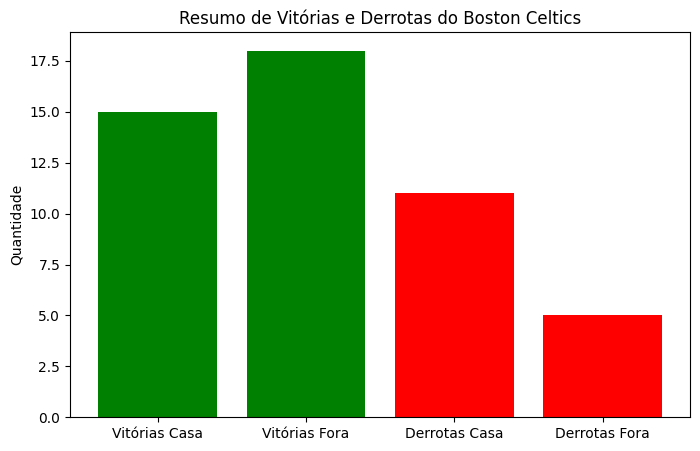

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

def load_celtics_games(data_file='../data/raw/Boston_Celtics_games.csv'):
    return pd.read_csv(data_file)

celtics_games = load_celtics_games()

season_id = 22024 
celtics_games_2023_24 = celtics_games[celtics_games['SEASON_ID'] == season_id]

def calculate_team_home_away_results(team_games):
    team_games.loc[:, 'is_home'] = team_games['MATCHUP'].apply(lambda x: '@' not in x)
    team_games.loc[:, 'is_away'] = team_games['MATCHUP'].apply(lambda x: '@' in x)
    
    total_wins = (team_games['WL'] == 'W').sum()
    home_wins = ((team_games['WL'] == 'W') & (team_games['is_home'])).sum()
    away_wins = ((team_games['WL'] == 'W') & (team_games['is_away'])).sum()

    total_losses = (team_games['WL'] == 'L').sum()
    home_losses = ((team_games['WL'] == 'L') & (team_games['is_home'])).sum()
    away_losses = ((team_games['WL'] == 'L') & (team_games['is_away'])).sum()

    results = {
        'Total de Vitórias': total_wins,
        'Vitórias em Casa': home_wins,
        'Vitórias Fora de Casa': away_wins,
        'Total de Derrotas': total_losses,
        'Derrotas em Casa': home_losses,
        'Derrotas Fora de Casa': away_losses
    }

    return results

celtics_results = calculate_team_home_away_results(celtics_games_2023_24)

print("Resumo das Vitórias e Derrotas do Boston Celtics na Temporada 2023-2024:")
for key, value in celtics_results.items():
    print(f"{key}: {value}")

labels = ['Vitórias Casa', 'Vitórias Fora', 'Derrotas Casa', 'Derrotas Fora']
values = [
    celtics_results['Vitórias em Casa'],
    celtics_results['Vitórias Fora de Casa'],
    celtics_results['Derrotas em Casa'],
    celtics_results['Derrotas Fora de Casa']
]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'green', 'red', 'red'])
plt.title(f"Resumo de Vitórias e Derrotas do Boston Celtics")
plt.ylabel("Quantidade")
plt.show()



#### **RF4 - Total dos dados do Boston Celtics [temporada 23-24 e temporada atual], conforme Tabelas 3 e 4;**

Estatísticas do Boston Celtics - Temporada 2023-2024:
Pontos por Jogo: 115.43
Assistências por Jogo: 24.98
Rebotes por Jogo: 44.2
Cestas de 3 Pontos Convertidas: 840
Derrotas em Casa: 11
Derrotas Fora de Casa: 5


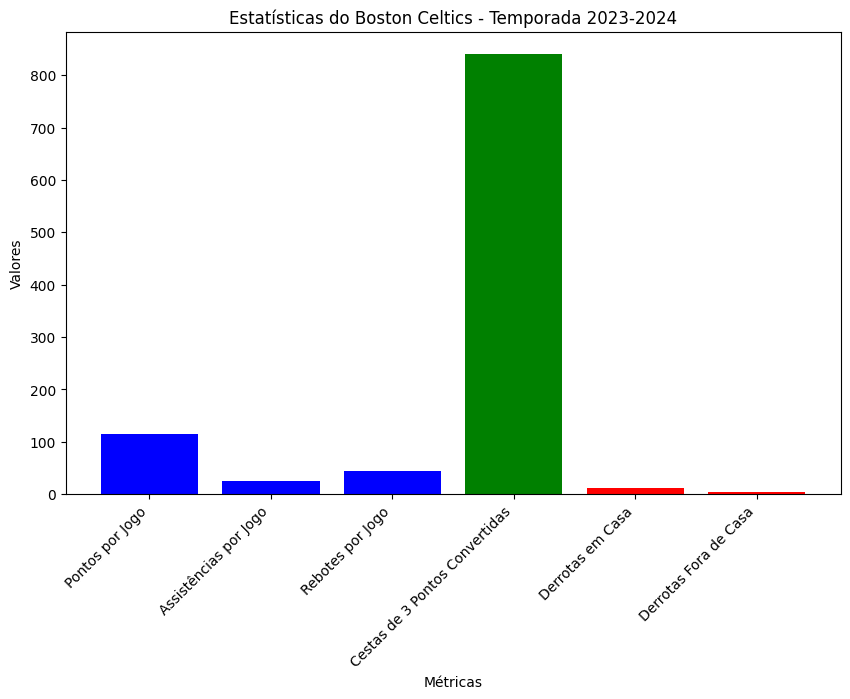

In [81]:
def calculate_team_stats_season(team_games):
    total_games = len(team_games)
    
    if total_games > 0:
        points_per_game = team_games['PTS'].sum() / total_games
        assists_per_game = team_games['AST'].sum() / total_games
        rebounds_per_game = team_games['REB'].sum() / total_games
    else:
        points_per_game = 0
        assists_per_game = 0
        rebounds_per_game = 0

    total_3_points_made = team_games['FG3M'].sum()
    home_losses = team_games[(team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("vs."))].shape[0]
    away_losses = team_games[(team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("@"))].shape[0]

    stats = {
        'Pontos por Jogo': round(points_per_game, 2),
        'Assistências por Jogo': round(assists_per_game, 2),
        'Rebotes por Jogo': round(rebounds_per_game, 2),
        'Cestas de 3 Pontos Convertidas': int(total_3_points_made),
        'Derrotas em Casa': home_losses,
        'Derrotas Fora de Casa': away_losses
    }
    
    return stats

season_id_2023_24 = 22024 
celtics_games_2023_24 = celtics_games[celtics_games['SEASON_ID'] == season_id_2023_24]

celtics_stats_2023_24 = calculate_team_stats_season(celtics_games_2023_24)

print("Estatísticas do Boston Celtics - Temporada 2023-2024:")
for key, value in celtics_stats_2023_24.items():
    print(f"{key}: {value}")

labels = list(celtics_stats_2023_24.keys())
values = list(celtics_stats_2023_24.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'blue', 'blue', 'green', 'red', 'red'])
plt.title("Estatísticas do Boston Celtics - Temporada 2023-2024")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.xticks(rotation=45, ha="right")
plt.show()


#### **RF5 - Divisão de alguns dados da Tabela 3, conforme Tabelas 4**

Divisão dos Dados do Boston Celtics - Temporada 2023-2024:
Total de Rebotes: 2166
Total de Rebotes Ofensivos: 557
Total de Rebotes Defensivos: 1609
Total de Pontos: 5656
Total de Cestas de 2 Pontos: 1166
Total de Cestas de 3 Pontos: 840
Total de Lances Livres: 804


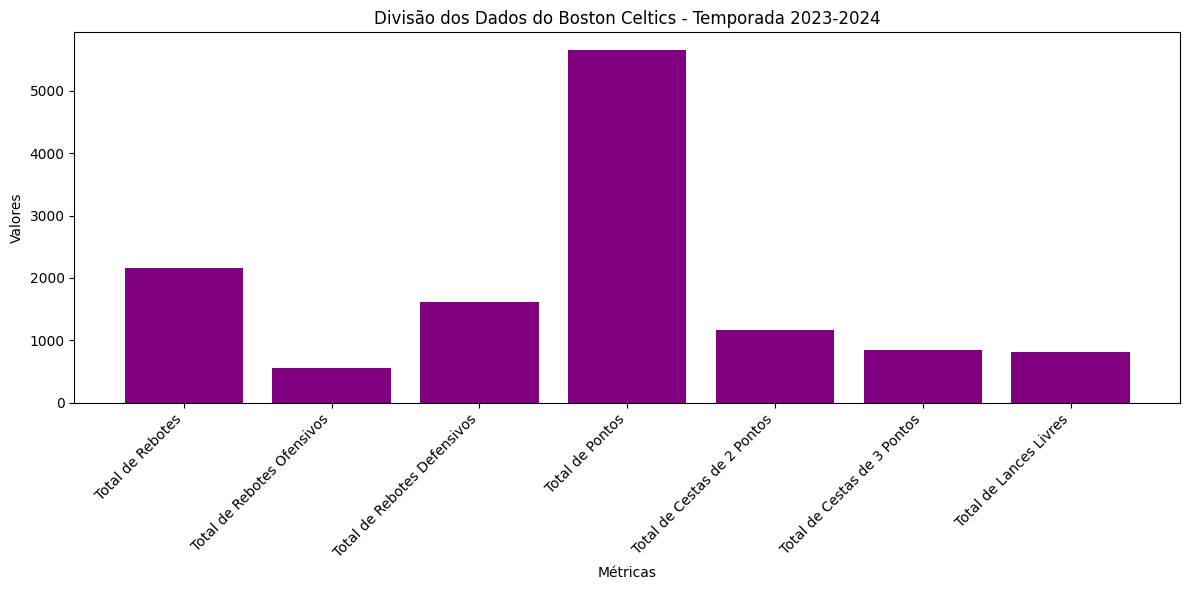

In [82]:
def calculate_detailed_stats(team_games):
    total_rebounds = team_games['REB'].sum()
    offensive_rebounds = team_games['OREB'].sum()
    defensive_rebounds = team_games['DREB'].sum()
    total_points = team_games['PTS'].sum()
    two_point_made = (team_games['FGM'] - team_games['FG3M']).sum()
    three_point_made = team_games['FG3M'].sum()
    free_throws_made = team_games['FTM'].sum()

    detailed_stats = {
        'Total de Rebotes': total_rebounds,
        'Total de Rebotes Ofensivos': offensive_rebounds,
        'Total de Rebotes Defensivos': defensive_rebounds,
        'Total de Pontos': total_points,
        'Total de Cestas de 2 Pontos': two_point_made,
        'Total de Cestas de 3 Pontos': three_point_made,
        'Total de Lances Livres': free_throws_made
    }
    
    return detailed_stats

season_id_2023_24 = 22024  
celtics_games_2023_24 = celtics_games[celtics_games['SEASON_ID'] == season_id_2023_24]

celtics_detailed_stats_2023_24 = calculate_detailed_stats(celtics_games_2023_24)

print("Divisão dos Dados do Boston Celtics - Temporada 2023-2024:")
for key, value in celtics_detailed_stats_2023_24.items():
    print(f"{key}: {value}")

labels = list(celtics_detailed_stats_2023_24.keys())
values = list(celtics_detailed_stats_2023_24.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='purple')
plt.title("Divisão dos Dados do Boston Celtics - Temporada 2023-2024")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### **RF6 - Apresentar os dados referentes a performance defensiva do time**

Dados Defensivos do Boston Celtics - Temporada 2023-2024:
Total de Roubos de Bola: 371
Total de Rebotes Defensivos: 1609
Total de Tocos por Jogo: 5.76
Total de Erros por Jogo: 11.73
Total de Faltas por Jogo: 16.55


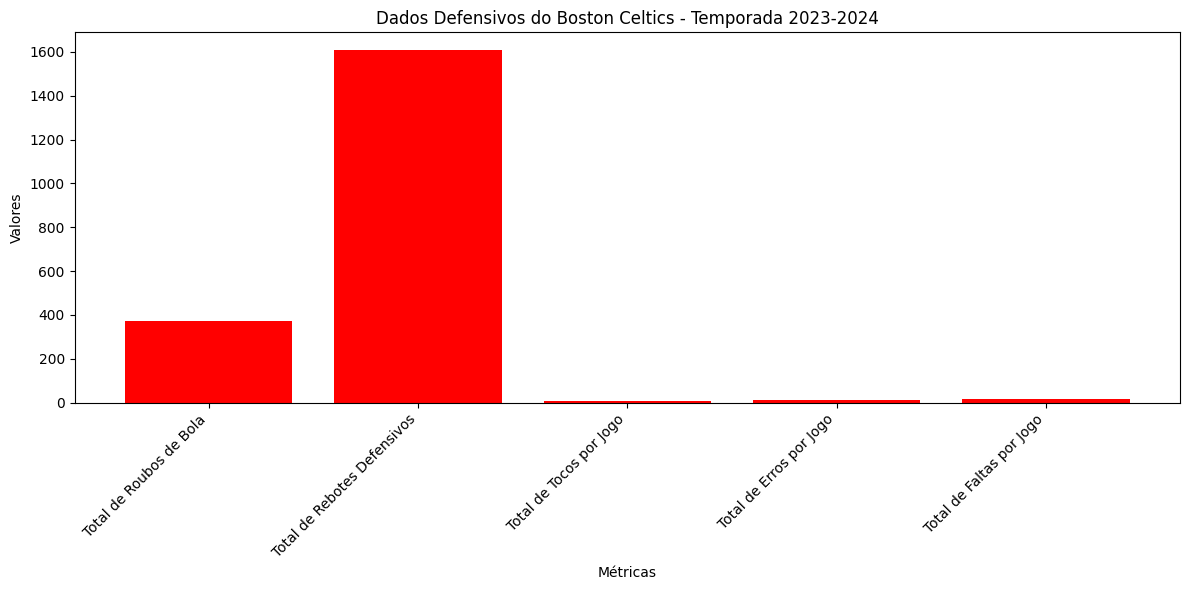

In [83]:
def calculate_defensive_stats(team_games):
    total_games = len(team_games)
    
    total_steals = team_games['STL'].sum()
    defensive_rebounds = team_games['DREB'].sum()
    blocks_per_game = team_games['BLK'].sum() / total_games if total_games > 0 else 0
    turnovers_per_game = team_games['TOV'].sum() / total_games if total_games > 0 else 0
    fouls_per_game = team_games['PF'].sum() / total_games if total_games > 0 else 0

    defensive_stats = {
        'Total de Roubos de Bola': total_steals,
        'Total de Rebotes Defensivos': defensive_rebounds,
        'Total de Tocos por Jogo': round(blocks_per_game, 2),
        'Total de Erros por Jogo': round(turnovers_per_game, 2),
        'Total de Faltas por Jogo': round(fouls_per_game, 2)
    }
    
    return defensive_stats

season_id_2023_24 = 22024 
celtics_games_2023_24 = celtics_games[celtics_games['SEASON_ID'] == season_id_2023_24]

celtics_defensive_stats_2023_24 = calculate_defensive_stats(celtics_games_2023_24)

print("Dados Defensivos do Boston Celtics - Temporada 2023-2024:")
for key, value in celtics_defensive_stats_2023_24.items():
    print(f"{key}: {value}")

labels = list(celtics_defensive_stats_2023_24.keys())
values = list(celtics_defensive_stats_2023_24.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='red')
plt.title("Dados Defensivos do Boston Celtics - Temporada 2023-2024")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### **RF7 - Jogos do Boston Celtics [temporada 23-24 e temporada atual], conforme Tabela 6.**

In [84]:
# Função para extrair o adversário do campo MATCHUP
def extract_opponent(matchup, team_name="Boston Celtics"):
    if "vs." in matchup:
        return matchup.replace(f"{team_name} vs. ", "")
    elif "@" in matchup:
        return matchup.replace(f"{team_name} @ ", "")
    else:
        return matchup

# Função para determinar se o jogo foi em casa ou fora
def home_or_away(matchup):
    if "vs." in matchup:
        return "Casa"
    elif "@" in matchup:
        return "Fora"
    else:
        return "Indefinido"

# Função para apresentar os jogos conforme Tabela 6
def present_games(team_games):
    games_info = team_games[['GAME_DATE', 'MATCHUP', 'WL', 'PTS']].copy()
    games_info['Adversário'] = games_info['MATCHUP'].apply(extract_opponent)
    games_info['Casa ou Fora'] = games_info['MATCHUP'].apply(home_or_away)
    games_info.rename(columns={'GAME_DATE': 'Data do Jogo', 'WL': 'Vitória ou Derrota', 'PTS': 'Placar'}, inplace=True)
    
    return games_info[['Data do Jogo', 'Adversário', 'Vitória ou Derrota', 'Casa ou Fora', 'Placar']]

# Temporada 2023-2024
season_id_2023_24 = 22024  # Valor correto para a temporada 2023-2024
celtics_games_2023_24 = celtics_games[celtics_games['SEASON_ID'] == season_id_2023_24]

# Apresentar os jogos para a temporada 2023-2024
games_info_2023_24 = present_games(celtics_games_2023_24)

# Exibir os resultados para a temporada 2023-2024
print("Jogos do Boston Celtics - Temporada 2023-2024:")
display(games_info_2023_24)


Jogos do Boston Celtics - Temporada 2023-2024:


,Data do Jogo,Adversário,Vitória ou Derrota,Casa ou Fora,Placar
0,2025-01-22,BOS @ LAC,W,Fora,117
1,2025-01-20,BOS @ GSW,W,Fora,125
2,2025-01-18,BOS vs. ATL,L,Casa,115
3,2025-01-17,BOS vs. ORL,W,Casa,121
4,2025-01-15,BOS @ TOR,L,Fora,97
5,2025-01-12,BOS vs. NOP,W,Casa,120
6,2025-01-10,BOS vs. SAC,L,Casa,97
7,2025-01-07,BOS @ DEN,W,Fora,118
8,2025-01-05,BOS @ OKC,L,Fora,92
9,2025-01-03,BOS @ HOU,W,Fora,109


### **RF8 - Gráficos de desempenho do Boston Celtics**

In [85]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd

season = "2024-25"

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=1610612738, season_nullable=season)
games_current = gamefinder.get_data_frames()[0]

def calculate_wins_losses(team_games):
    total_wins = (team_games['WL'] == 'W').sum()
    total_losses = (team_games['WL'] == 'L').sum()
    return total_wins, total_losses

def calculate_home_away_wins_losses(team_games):
    home_wins = ((team_games['WL'] == 'W') & (team_games['MATCHUP'].str.contains("vs."))).sum()
    away_wins = ((team_games['WL'] == 'W') & (team_games['MATCHUP'].str.contains("@"))).sum()
    home_losses = ((team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("vs."))).sum()
    away_losses = ((team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("@"))).sum()
    return home_wins, away_wins, home_losses, away_losses

def calculate_points_scored_conceded(team_games):
    home_games = team_games[team_games['MATCHUP'].str.contains("vs.")]
    away_games = team_games[team_games['MATCHUP'].str.contains("@")]
    points_scored_home = home_games['PTS'].mean()
    points_scored_away = away_games['PTS'].mean()
    points_conceded_home = home_games['PTS'].mean()  
    points_conceded_away = away_games['PTS'].mean()  
    return points_scored_home, points_scored_away, points_conceded_home, points_conceded_away

def calculate_win_loss_sequence(team_games):
    team_games = team_games.sort_values('GAME_DATE')
    team_games['Result'] = team_games['WL'].apply(lambda x: 1 if x == 'W' else -1)
    return team_games['GAME_DATE'], team_games['Result'].cumsum()

def calculate_team_points_scored_conceded(team_games):
    team_points = team_games.groupby('TEAM_ABBREVIATION').agg({'PTS': 'mean'}).reset_index()
    return team_points

# Temporada 2023-2024
total_wins_2023_24, total_losses_2023_24 = calculate_wins_losses(celtics_games_2023_24)
home_wins_2023_24, away_wins_2023_24, home_losses_2023_24, away_losses_2023_24 = calculate_home_away_wins_losses(celtics_games_2023_24)
points_scored_home_2023_24, points_scored_away_2023_24, points_conceded_home_2023_24, points_conceded_away_2023_24 = calculate_points_scored_conceded(celtics_games_2023_24)
dates_2023_24, win_loss_sequence_2023_24 = calculate_win_loss_sequence(celtics_games_2023_24)
team_points_2023_24 = calculate_team_points_scored_conceded(celtics_games_2023_24)

# Temporada Atual
total_wins_current, total_losses_current = calculate_wins_losses(games_current)
home_wins_current, away_wins_current, home_losses_current, away_losses_current = calculate_home_away_wins_losses(games_current)
points_scored_home_current, points_scored_away_current, points_conceded_home_current, points_conceded_away_current = calculate_points_scored_conceded(games_current)
dates_current, win_loss_sequence_current = calculate_win_loss_sequence(games_current)
team_points_current = calculate_team_points_scored_conceded(games_current)


Gráfico de Barras Empilhado para Vitórias e Derrotas

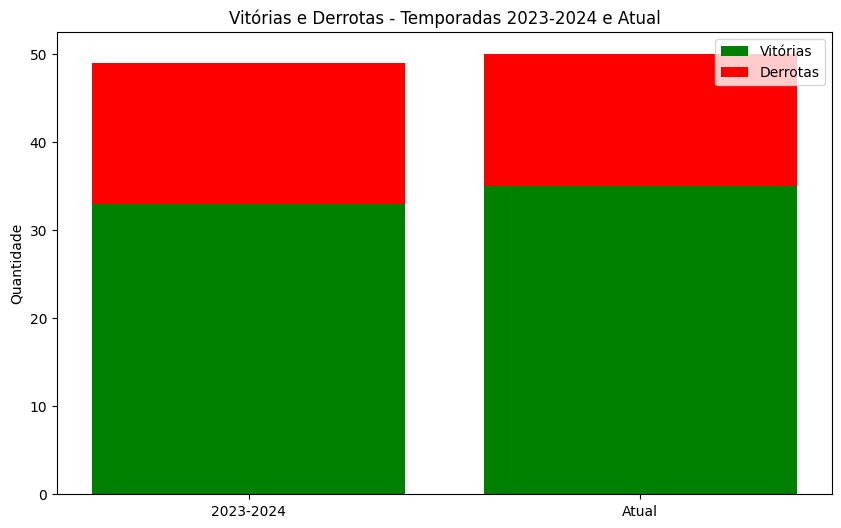

In [86]:
labels = ['2023-2024', 'Atual']
wins = [total_wins_2023_24, total_wins_current]
losses = [total_losses_2023_24, total_losses_current]

plt.figure(figsize=(10, 6))
plt.bar(labels, wins, color='green', label='Vitórias')
plt.bar(labels, losses, bottom=wins, color='red', label='Derrotas')
plt.title("Vitórias e Derrotas - Temporadas 2023-2024 e Atual")
plt.ylabel("Quantidade")
plt.legend()
plt.show()


Gráfico de Barras Agrupado para Vitórias e Derrotas em Casa e Fora

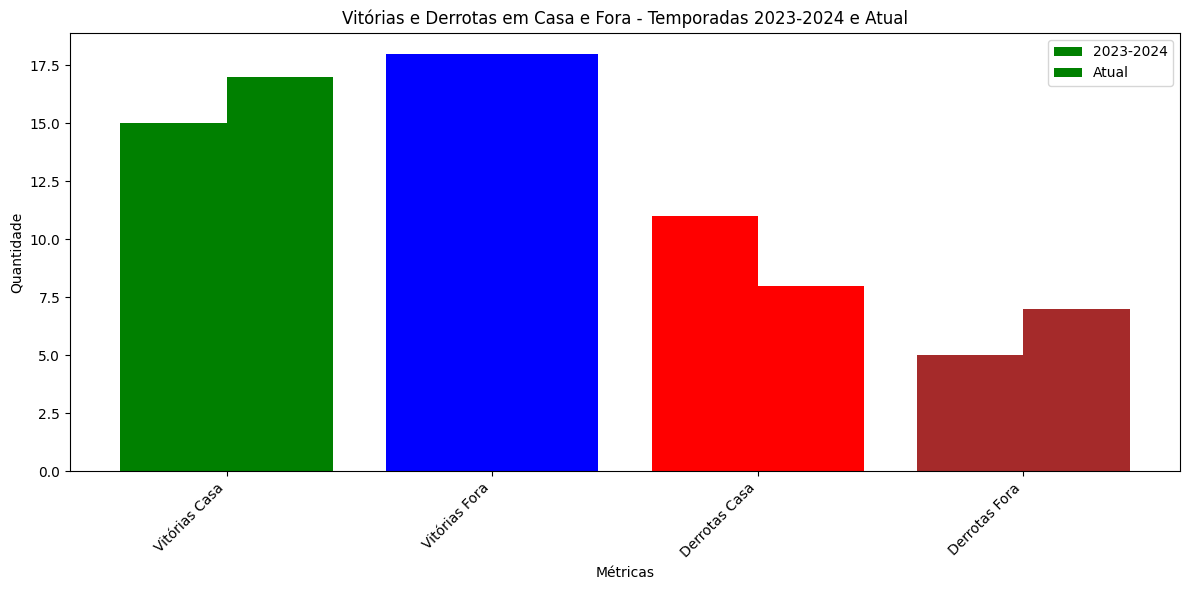

In [87]:
labels = ['Vitórias Casa', 'Vitórias Fora', 'Derrotas Casa', 'Derrotas Fora']
values_2023_24 = [home_wins_2023_24, away_wins_2023_24, home_losses_2023_24, away_losses_2023_24]
values_current = [home_wins_current, away_wins_current, home_losses_current, away_losses_current]

x = range(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(x, values_2023_24, width=0.4, label='2023-2024', color=['green', 'blue', 'red', 'brown'], align='center')
plt.bar([p + 0.4 for p in x], values_current, width=0.4, label='Atual', color=['green', 'blue', 'red', 'brown'], align='center')

plt.title("Vitórias e Derrotas em Casa e Fora - Temporadas 2023-2024 e Atual")
plt.xlabel("Métricas")
plt.ylabel("Quantidade")
plt.xticks([p + 0.2 for p in x], labels, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


Gráfico Histograma para exibir a frequência de vitórias e derrotas

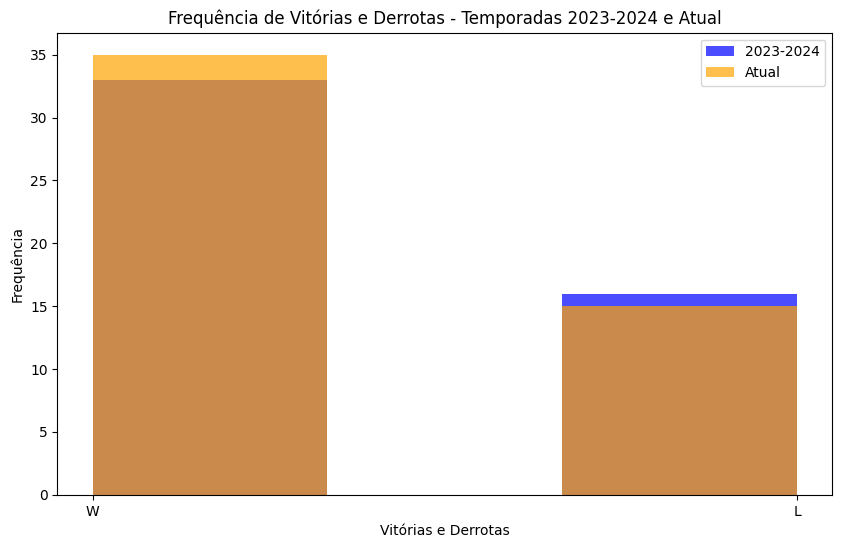

In [88]:
plt.figure(figsize=(10, 6))
plt.hist(celtics_games_2023_24['WL'], bins=3, color='blue', alpha=0.7, label='2023-2024')
plt.hist(games_current['WL'], bins=3, color='orange', alpha=0.7, label='Atual')
plt.title("Frequência de Vitórias e Derrotas - Temporadas 2023-2024 e Atual")
plt.xlabel("Vitórias e Derrotas")
plt.ylabel("Frequência")
plt.legend()
plt.show()


Gráfico de Setor (Pizza) para o percentual de vitórias e derrotas em casa e fora

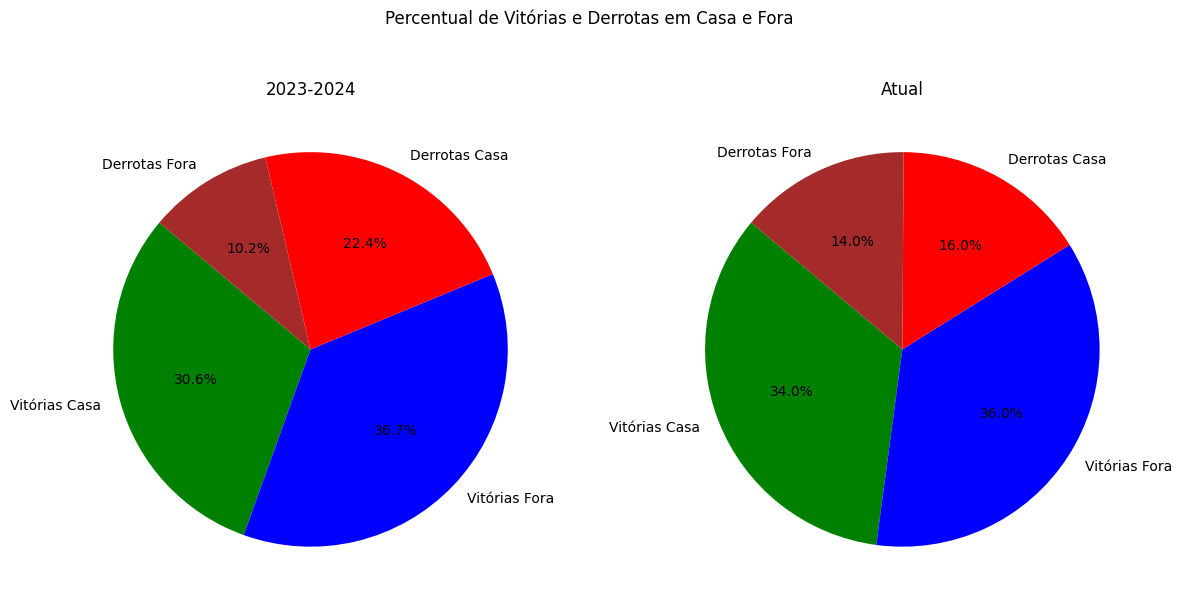

In [89]:
labels = ['Vitórias Casa', 'Vitórias Fora', 'Derrotas Casa', 'Derrotas Fora']
sizes_2023_24 = [home_wins_2023_24, away_wins_2023_24, home_losses_2023_24, away_losses_2023_24]
sizes_current = [home_wins_current, away_wins_current, home_losses_current, away_losses_current]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.pie(sizes_2023_24, labels=labels, autopct='%1.1f%%', colors=['green', 'blue', 'red', 'brown'], startangle=140)
ax1.set_title('2023-2024')
ax2.pie(sizes_current, labels=labels, autopct='%1.1f%%', colors=['green', 'blue', 'red', 'brown'], startangle=140)
ax2.set_title('Atual')
plt.suptitle("Percentual de Vitórias e Derrotas em Casa e Fora")
plt.show()


Gráfico de Radar exibindo a média de pontos marcados e sofridos em casa e fora

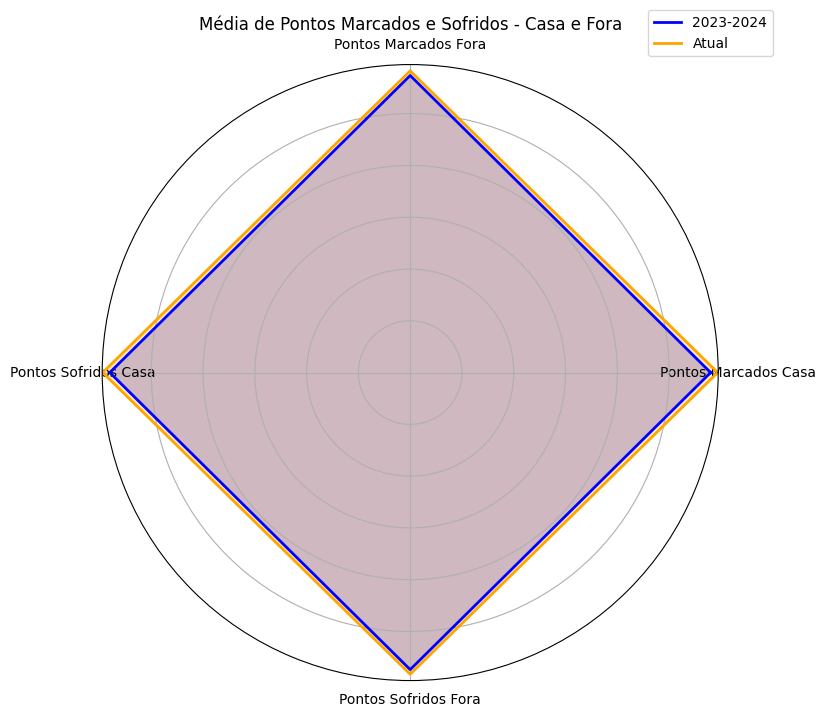

In [90]:
import numpy as np

labels = ['Pontos Marcados Casa', 'Pontos Marcados Fora', 'Pontos Sofridos Casa', 'Pontos Sofridos Fora']
stats_2023_24 = [points_scored_home_2023_24, points_scored_away_2023_24, points_conceded_home_2023_24, points_conceded_away_2023_24]
stats_current = [points_scored_home_current, points_scored_away_current, points_conceded_home_current, points_conceded_away_current]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats_2023_24 += stats_2023_24[:1]
stats_current += stats_current[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, stats_2023_24, color='blue', alpha=0.25)
ax.fill(angles, stats_current, color='orange', alpha=0.25)
ax.plot(angles, stats_2023_24, color='blue', linewidth=2, label='2023-2024')
ax.plot(angles, stats_current, color='orange', linewidth=2, label='Atual')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title("Média de Pontos Marcados e Sofridos - Casa e Fora")
plt.show()


Gráfico de Linhas exibindo a sequência de vitórias e derrotas ao longo da temporada

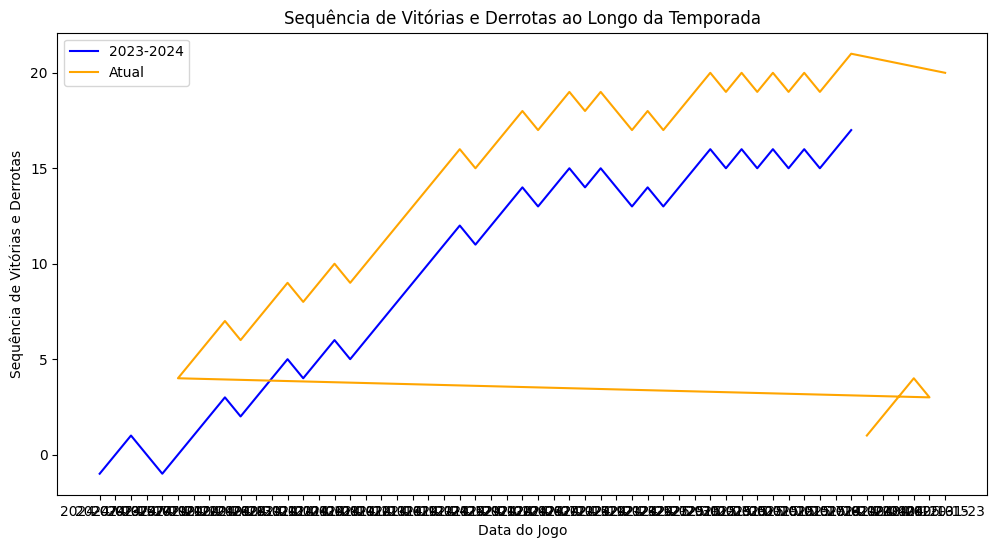

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(dates_2023_24, win_loss_sequence_2023_24, label='2023-2024', color='blue')
plt.plot(dates_current, win_loss_sequence_current, label='Atual', color='orange')
plt.title("Sequência de Vitórias e Derrotas ao Longo da Temporada")
plt.xlabel("Data do Jogo")
plt.ylabel("Sequência de Vitórias e Derrotas")
plt.legend()
plt.show()


Gráfico de Dispersão exibindo equipes e a média de pontos marcados e sofridos

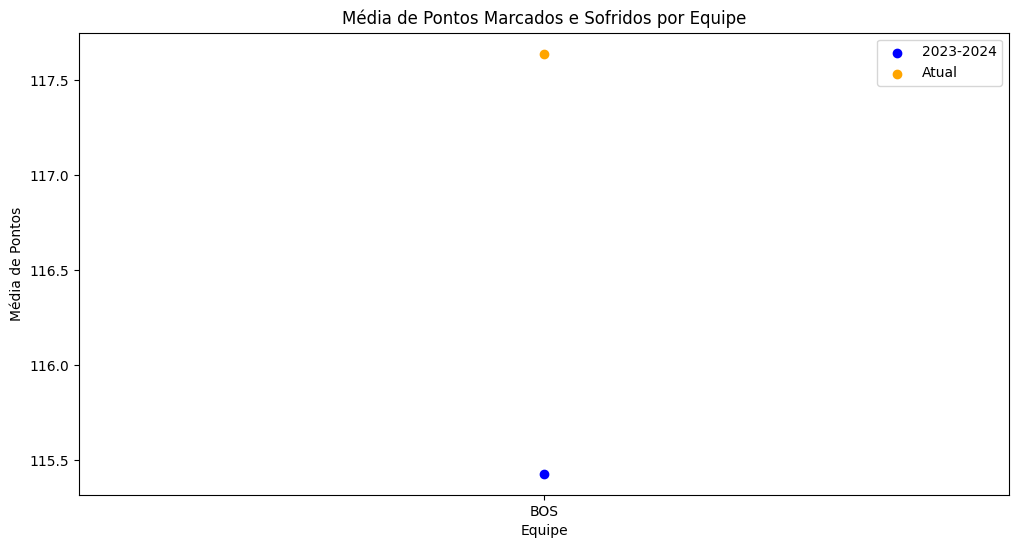

In [92]:
plt.figure(figsize=(12, 6))
plt.scatter(team_points_2023_24['TEAM_ABBREVIATION'], team_points_2023_24['PTS'], label='2023-2024', color='blue')
plt.scatter(team_points_current['TEAM_ABBREVIATION'], team_points_current['PTS'], label='Atual', color='orange')
plt.title("Média de Pontos Marcados e Sofridos por Equipe")
plt.xlabel("Equipe")
plt.ylabel("Média de Pontos")
plt.legend()
plt.show()


Gráfico de Barras para Dados Defensivos (RF6)

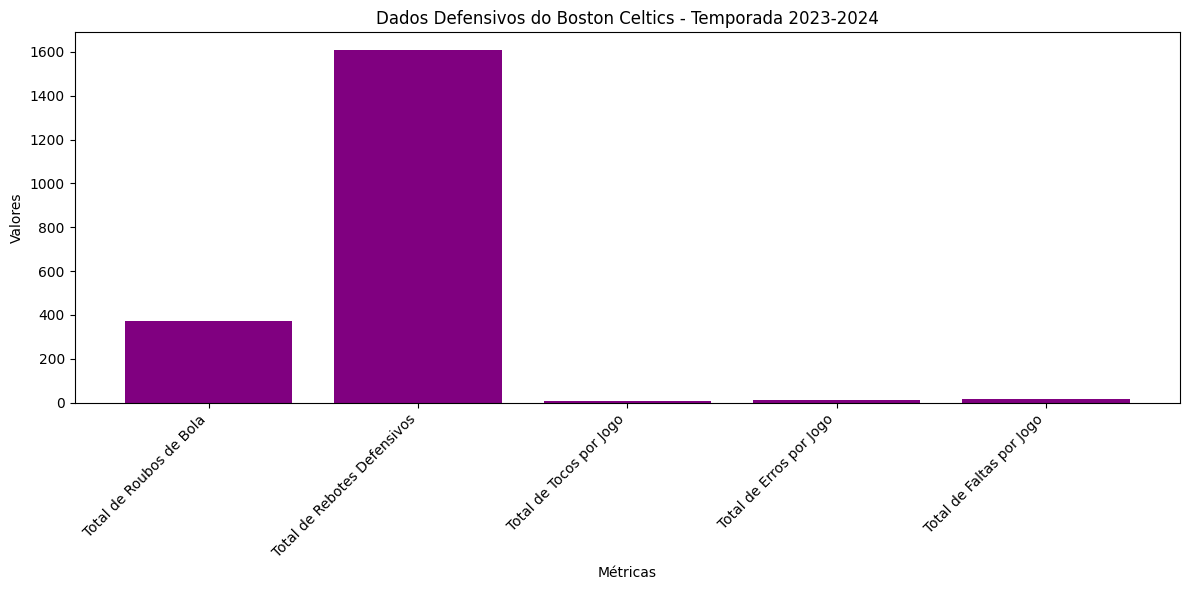

In [93]:
labels = list(celtics_defensive_stats_2023_24.keys())
values = list(celtics_defensive_stats_2023_24.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='purple')
plt.title("Dados Defensivos do Boston Celtics - Temporada 2023-2024")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Gráfico de Linhas para Jogos (RF7)

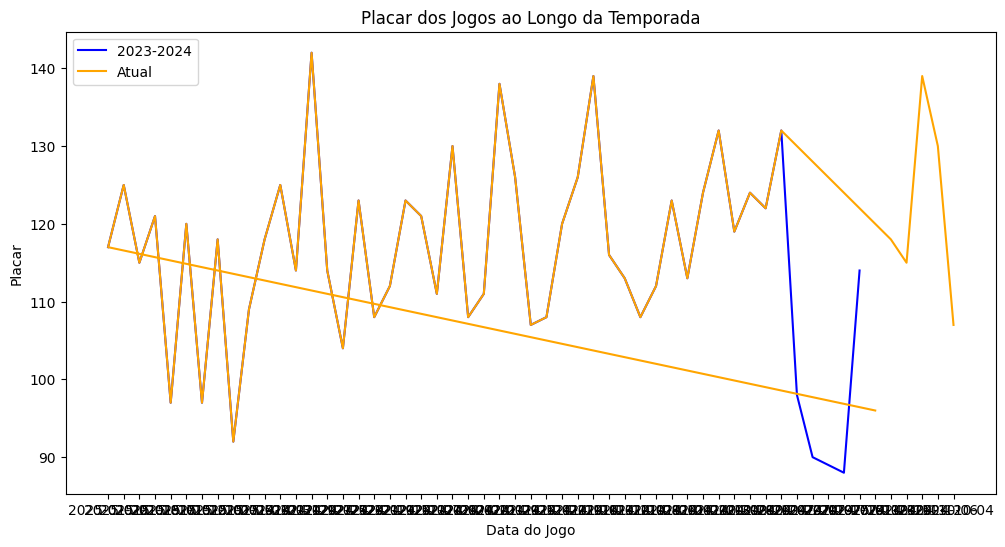

In [94]:
def present_games(team_games):
    games_info = team_games[['GAME_DATE', 'MATCHUP', 'WL', 'PTS']].copy()
    games_info['Adversário'] = games_info['MATCHUP'].apply(extract_opponent)
    games_info['Casa ou Fora'] = games_info['MATCHUP'].apply(home_or_away)
    games_info.rename(columns={'GAME_DATE': 'Data do Jogo', 'WL': 'Vitória ou Derrota', 'PTS': 'Placar'}, inplace=True)
    
    return games_info[['Data do Jogo', 'Adversário', 'Vitória ou Derrota', 'Casa ou Fora', 'Placar']]

games_info_current = present_games(games_current)

plt.figure(figsize=(12, 6))
plt.plot(games_info_2023_24['Data do Jogo'], games_info_2023_24['Placar'], label='2023-2024', color='blue')
plt.plot(games_info_current['Data do Jogo'], games_info_current['Placar'], label='Atual', color='orange')
plt.title("Placar dos Jogos ao Longo da Temporada")
plt.xlabel("Data do Jogo")
plt.ylabel("Placar")
plt.legend()
plt.show()


### **RF9 - Para cada tabela e/ou requisito que exiba dados gerados pelo sistema será necessário que os dados sejam salvos em um arquivo csv.**

In [95]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd
import os

season_current = "2024-25"
season_2023_24 = "2023-24"

gamefinder_2023_24 = leaguegamefinder.LeagueGameFinder(team_id_nullable=1610612738, season_nullable=season_2023_24)
games_2023_24 = gamefinder_2023_24.get_data_frames()[0]

gamefinder_current = leaguegamefinder.LeagueGameFinder(team_id_nullable=1610612738, season_nullable=season_current)
games_current = gamefinder_current.get_data_frames()[0]

def calculate_team_stats_season(team_games):
    total_games = len(team_games)
    if total_games > 0:
        points_per_game = team_games['PTS'].sum() / total_games
        assists_per_game = team_games['AST'].sum() / total_games
        rebounds_per_game = team_games['REB'].sum() / total_games
    else:
        points_per_game = 0
        assists_per_game = 0
        rebounds_per_game = 0
    total_3_points_made = team_games['FG3M'].sum()
    home_losses = team_games[(team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("vs."))].shape[0]
    away_losses = team_games[(team_games['WL'] == 'L') & (team_games['MATCHUP'].str.contains("@"))].shape[0]
    stats = {
        'Pontos por Jogo': round(points_per_game, 2),
        'Assistências por Jogo': round(assists_per_game, 2),
        'Rebotes por Jogo': round(rebounds_per_game, 2),
        'Cestas de 3 Pontos Convertidas': int(total_3_points_made),
        'Derrotas em Casa': home_losses,
        'Derrotas Fora de Casa': away_losses
    }
    return stats

def calculate_detailed_stats(team_games):
    total_rebounds = team_games['REB'].sum()
    offensive_rebounds = team_games['OREB'].sum()
    defensive_rebounds = team_games['DREB'].sum()
    total_points = team_games['PTS'].sum()
    two_point_made = (team_games['FGM'] - team_games['FG3M']).sum()
    three_point_made = team_games['FG3M'].sum()
    free_throws_made = team_games['FTM'].sum()
    detailed_stats = {
        'Total de Rebotes': total_rebounds,
        'Total de Rebotes Ofensivos': offensive_rebounds,
        'Total de Rebotes Defensivos': defensive_rebounds,
        'Total de Pontos': total_points,
        'Total de Cestas de 2 Pontos': two_point_made,
        'Total de Cestas de 3 Pontos': three_point_made,
        'Total de Lances Livres': free_throws_made
    }
    return detailed_stats

def calculate_defensive_stats(team_games):
    total_games = len(team_games)
    total_steals = team_games['STL'].sum()
    defensive_rebounds = team_games['DREB'].sum()
    blocks_per_game = team_games['BLK'].sum() / total_games if total_games > 0 else 0
    turnovers_per_game = team_games['TOV'].sum() / total_games if total_games > 0 else 0
    fouls_per_game = team_games['PF'].sum() / total_games if total_games > 0 else 0
    defensive_stats = {
        'Total de Roubos de Bola': total_steals,
        'Total de Rebotes Defensivos': defensive_rebounds,
        'Total de Tocos por Jogo': round(blocks_per_game, 2),
        'Total de Erros por Jogo': round(turnovers_per_game, 2),
        'Total de Faltas por Jogo': round(fouls_per_game, 2)
    }
    return defensive_stats

def present_games(team_games):
    games_info = team_games[['GAME_DATE', 'MATCHUP', 'WL', 'PTS']].copy()
    games_info['Adversário'] = games_info['MATCHUP'].apply(extract_opponent)
    games_info['Casa ou Fora'] = games_info['MATCHUP'].apply(home_or_away)
    games_info.rename(columns={'GAME_DATE': 'Data do Jogo', 'WL': 'Vitória ou Derrota', 'PTS': 'Placar'}, inplace=True)
    return games_info[['Data do Jogo', 'Adversário', 'Vitória ou Derrota', 'Casa ou Fora', 'Placar']]

def extract_opponent(matchup, team_name="Boston Celtics"):
    if "vs." in matchup:
        return matchup.replace(f"{team_name} vs. ", "")
    elif "@" in matchup:
        return matchup.replace(f"{team_name} @ ", "")
    else:
        return matchup

def home_or_away(matchup):
    if "vs." in matchup:
        return "Casa"
    elif "@" in matchup:
        return "Fora"
    else:
        return "Indefinido"

celtics_stats_2023_24 = calculate_team_stats_season(games_2023_24)
celtics_detailed_stats_2023_24 = calculate_detailed_stats(games_2023_24)
celtics_defensive_stats_2023_24 = calculate_defensive_stats(games_2023_24)
games_info_2023_24 = present_games(games_2023_24)

celtics_stats_current = calculate_team_stats_season(games_current)
celtics_detailed_stats_current = calculate_detailed_stats(games_current)
celtics_defensive_stats_current = calculate_defensive_stats(games_current)
games_info_current = present_games(games_current)

print("Estatísticas Gerais - Temporada 2023-2024:")
print(celtics_stats_2023_24)
print("\nEstatísticas Gerais - Temporada Atual:")
print(celtics_stats_current)
print("\nDivisão dos Dados - Temporada 2023-2024:")
print(celtics_detailed_stats_2023_24)
print("\nDivisão dos Dados - Temporada Atual:")
print(celtics_detailed_stats_current)
print("\nDados Defensivos - Temporada 2023-2024:")
print(celtics_defensive_stats_2023_24)
print("\nDados Defensivos - Temporada Atual:")
print(celtics_defensive_stats_current)
print("\nJogos - Temporada 2023-2024:")
print(games_info_2023_24.head())
print("\nJogos - Temporada Atual:")
print(games_info_current.head())

output_filename = "celtics_analysis_data.csv"

def save_to_csv(df, filename, mode='a', header=False):
    filepath = os.path.join(output_dir, filename)
    df.to_csv(filepath, mode=mode, header=header, index=False)
    print(f"Dados salvos em: {filepath}")

output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

stats_2023_24_df = pd.DataFrame([celtics_stats_2023_24])
save_to_csv(stats_2023_24_df, output_filename, mode='w', header=True)

stats_current_df = pd.DataFrame([celtics_stats_current])
save_to_csv(stats_current_df, output_filename, mode='a', header=False)

detailed_stats_2023_24_df = pd.DataFrame([celtics_detailed_stats_2023_24])
save_to_csv(detailed_stats_2023_24_df, output_filename, mode='a', header=False)

detailed_stats_current_df = pd.DataFrame([celtics_detailed_stats_current])
save_to_csv(detailed_stats_current_df, output_filename, mode='a', header=False)

defensive_stats_2023_24_df = pd.DataFrame([celtics_defensive_stats_2023_24])
save_to_csv(defensive_stats_2023_24_df, output_filename, mode='a', header=False)

defensive_stats_current_df = pd.DataFrame([celtics_defensive_stats_current])
save_to_csv(defensive_stats_current_df, output_filename, mode='a', header=False)

save_to_csv(games_info_2023_24, output_filename, mode='a', header=False)

save_to_csv(games_info_current, output_filename, mode='a', header=False)

win_loss_sequence_2023_24_df = pd.DataFrame({'Data do Jogo': dates_2023_24, 'Sequência': win_loss_sequence_2023_24})
save_to_csv(win_loss_sequence_2023_24_df, output_filename, mode='a', header=False)

win_loss_sequence_current_df = pd.DataFrame({'Data do Jogo': dates_current, 'Sequência': win_loss_sequence_current})
save_to_csv(win_loss_sequence_current_df, output_filename, mode='a', header=False)

save_to_csv(team_points_2023_24, output_filename, mode='a', header=False)
save_to_csv(team_points_current, output_filename, mode='a', header=False)



Estatísticas Gerais - Temporada 2023-2024:
{'Pontos por Jogo': 118.27, 'Assistências por Jogo': 26.24, 'Rebotes por Jogo': 45.89, 'Cestas de 3 Pontos Convertidas': 1705, 'Derrotas em Casa': 6, 'Derrotas Fora de Casa': 16}

Estatísticas Gerais - Temporada Atual:
{'Pontos por Jogo': 117.64, 'Assistências por Jogo': 25.8, 'Rebotes por Jogo': 45.04, 'Cestas de 3 Pontos Convertidas': 896, 'Derrotas em Casa': 8, 'Derrotas Fora de Casa': 7}

Divisão dos Dados - Temporada 2023-2024:
{'Total de Rebotes': 4864, 'Total de Rebotes Ofensivos': 1126, 'Total de Rebotes Defensivos': 3738, 'Total de Pontos': 12537, 'Total de Cestas de 2 Pontos': 2851, 'Total de Cestas de 3 Pontos': 1705, 'Total de Lances Livres': 1720}

Divisão dos Dados - Temporada Atual:
{'Total de Rebotes': 2252, 'Total de Rebotes Ofensivos': 566, 'Total de Rebotes Defensivos': 1686, 'Total de Pontos': 5882, 'Total de Cestas de 2 Pontos': 1187, 'Total de Cestas de 3 Pontos': 896, 'Total de Lances Livres': 820}

Dados Defensivos - Te

### **RF10 - Para cada gráfico gerado pelo sistema será necessário que sejam exibidos em formato HTML e abertos no Browser.**

In [96]:
import plotly.graph_objects as go
import plotly.express as px
import webbrowser
from pathlib import Path

html_output_dir = "html_output"
os.makedirs(html_output_dir, exist_ok=True)

def save_and_open_html(fig, filename):
    filepath = Path(html_output_dir) / filename
    fig.write_html(filepath)
    webbrowser.open(f"file://{filepath.resolve()}")

labels = ['2023-2024', 'Atual']
wins = [total_wins_2023_24, total_wins_current]
losses = [total_losses_2023_24, total_losses_current]

fig = go.Figure(data=[
    go.Bar(name='Vitórias', x=labels, y=wins, marker_color='green'),
    go.Bar(name='Derrotas', x=labels, y=losses, marker_color='red')
])
fig.update_layout(barmode='stack', title="Vitórias e Derrotas - Temporadas 2023-2024 e Atual")
save_and_open_html(fig, "stacked_bar_wins_losses.html")

labels = ['Vitórias Casa', 'Vitórias Fora', 'Derrotas Casa', 'Derrotas Fora']
values_2023_24 = [home_wins_2023_24, away_wins_2023_24, home_losses_2023_24, away_losses_2023_24]
values_current = [home_wins_current, away_wins_current, home_losses_current, away_losses_current]

fig = go.Figure(data=[
    go.Bar(name='2023-2024', x=labels, y=values_2023_24, marker_color=['green', 'blue', 'red', 'brown']),
    go.Bar(name='Atual', x=labels, y=values_current, marker_color=['green', 'blue', 'red', 'brown'])
])
fig.update_layout(barmode='group', title="Vitórias e Derrotas em Casa e Fora - Temporadas 2023-2024 e Atual")
save_and_open_html(fig, "grouped_bar_home_away_wins_losses.html")

fig = px.histogram(celtics_games_2023_24, x='WL', title="Frequência de Vitórias e Derrotas - Temporada 2023-2024", color='WL')
save_and_open_html(fig, "histogram_wins_losses_2023_24.html")

fig = px.histogram(games_current, x='WL', title="Frequência de Vitórias e Derrotas - Temporada Atual", color='WL')
save_and_open_html(fig, "histogram_wins_losses_current.html")

labels = ['Vitórias Casa', 'Vitórias Fora', 'Derrotas Casa', 'Derrotas Fora']
sizes_2023_24 = [home_wins_2023_24, away_wins_2023_24, home_losses_2023_24, away_losses_2023_24]
sizes_current = [home_wins_current, away_wins_current, home_losses_current, away_losses_current]

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes_2023_24, hole=.3)])
fig.update_layout(title="Percentual de Vitórias e Derrotas em Casa e Fora - Temporada 2023-2024")
save_and_open_html(fig, "pie_chart_home_away_wins_losses_2023_24.html")

fig = go.Figure(data=[go.Pie(labels=labels, values=sizes_current, hole=.3)])
fig.update_layout(title="Percentual de Vitórias e Derrotas em Casa e Fora - Temporada Atual")
save_and_open_html(fig, "pie_chart_home_away_wins_losses_current.html")

labels = ['Pontos Marcados Casa', 'Pontos Marcados Fora', 'Pontos Sofridos Casa', 'Pontos Sofridos Fora']
stats_2023_24 = [points_scored_home_2023_24, points_scored_away_2023_24, points_conceded_home_2023_24, points_conceded_away_2023_24]
stats_current = [points_scored_home_current, points_scored_away_current, points_conceded_home_current, points_conceded_away_current]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=stats_2023_24, theta=labels, fill='toself', name='2023-2024', marker_color='blue'))
fig.add_trace(go.Scatterpolar(r=stats_current, theta=labels, fill='toself', name='Atual', marker_color='orange'))
fig.update_layout(title="Média de Pontos Marcados e Sofridos - Casa e Fora")
save_and_open_html(fig, "radar_chart_points_scored_conceded.html")

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_2023_24, y=win_loss_sequence_2023_24, mode='lines', name='2023-2024', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=dates_current, y=win_loss_sequence_current, mode='lines', name='Atual', line=dict(color='orange')))
fig.update_layout(title="Sequência de Vitórias e Derrotas ao Longo da Temporada", xaxis_title="Data do Jogo", yaxis_title="Sequência de Vitórias e Derrotas")
save_and_open_html(fig, "line_chart_win_loss_sequence.html")

fig = px.scatter(team_points_2023_24, x='TEAM_ABBREVIATION', y='PTS', title="Média de Pontos Marcados e Sofridos por Equipe - Temporada 2023-2024")
save_and_open_html(fig, "scatter_plot_team_points_2023_24.html")

fig = px.scatter(team_points_current, x='TEAM_ABBREVIATION', y='PTS', title="Média de Pontos Marcados e Sofridos por Equipe - Temporada Atual")
save_and_open_html(fig, "scatter_plot_team_points_current.html")


### **PARTE 2**

### **RF1: Dados Básicos dos Jogadores**

In [21]:
import pandas as pd

players_df = pd.read_csv('../data/players.csv')

players_df['Experiência'] = players_df['Experiência'].apply(lambda x: 0 if x == 'Rookie' else x)

def show_player_data():
    print(players_df[['Nome', 'Altura', 'Peso', 'Idade', 'Experiência', 'Posição', 'Universidade', 'Salário']])

show_player_data()


                   Nome                      Altura Peso                Idade  \
0          Jayson Tatum                    Duke/USA  6-8         jayson-tatum   
1         Derrick White                Colorado/USA  6-4        derrick-white   
2          Jaylen Brown              California/USA  6-6         jaylen-brown   
3            Al Horford  Florida/Dominican Republic  6-9           al-horford   
4          Marcus Smart          Oklahoma State/USA  6-3         marcus-smart   
5   Robert Williams III               Texas A&M/USA  6-9  robert-williams-iii   
6       Malcolm Brogdon                Virginia/USA  6-4      malcolm-brogdon   
7            Sam Hauser                Virginia/USA  6-7           sam-hauser   
8           Luke Kornet              Vanderbilt/USA  7-1          luke-kornet   
9      Payton Pritchard                  Oregon/USA  6-1     payton-pritchard   
10       Grant Williams               Tennessee/USA  6-6       grant-williams   
11         Juwan Morgan     

### **RF2: Dados dos Jogadores em Partidas**

In [59]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.static import players
import pandas as pd

def get_player_id(player_name):
    player_dict = players.get_players()
    player_data = [player for player in player_dict if player['full_name'] == player_name]
    if player_data:
        return player_data[0]['id']
    else:
        raise ValueError(f"Jogador {player_name} não encontrado.")

def get_player_games(player_id):
    player_game_log = playergamelog.PlayerGameLog(player_id=player_id, season="2024")
    games = player_game_log.get_data_frames()[0]
    return games

def show_player_game_data(player_name):
    try:
        player_id = get_player_id(player_name)
        
        games = get_player_games(player_id)
        
        print(f"Colunas disponíveis para {player_name}: {games.columns.tolist()}")
        
        if games.empty:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
            return
        
        player_game_data = []
        
        for _, game in games.iterrows():
            game_date = game['GAME_DATE']
            opponent = game['MATCHUP']
            result = game['WL']
            location = "Casa" if 'vs' in opponent else "Fora"
            points = game['PTS']
            rebounds = game['REB']
            assists = game['AST']
            three_point_attempts = game['FG3A']
            three_point_made = game['FG3M']
            minutes = game['MIN']
            
            player_game_data.append({
                'Data do Jogo': game_date,
                'Adversário': opponent,
                'V ou D': result,
                'Casa/Fora': location,
                'PTS': points,
                'REB': rebounds,
                'AST': assists,
                'FG3A': three_point_attempts,
                'FG3_PCT': three_point_made,
                'MIN': minutes
            })
        
        if player_game_data:
            player_games_df = pd.DataFrame(player_game_data)
            print(f"Dados de jogo para {player_name}:\n", player_games_df)
        else:
            print(f"Não há dados disponíveis para o jogador {player_name}.")
    
    except ValueError as e:
        print(e)

# Chamar dados de cada jogador individualmente
show_player_game_data('Jayson Tatum')
# show_player_game_data('Derrick White')
# show_player_game_data('Jaylen Brown')
# show_player_game_data('Al Horford')
# show_player_game_data('Marcus Smart')
# show_player_game_data('Robert Williams III')
# show_player_game_data('Malcolm Brogdon')
# show_player_game_data('Sam Hauser')
# show_player_game_data('Luke Kornet')
# show_player_game_data('Payton Pritchard')
# show_player_game_data('Grant Williams')
# show_player_game_data('Juwan Morgan')
# show_player_game_data('Matisse Thybulle')



Colunas disponíveis para Jayson Tatum: ['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE']
Dados de jogo para Jayson Tatum:
     Data do Jogo   Adversário V ou D Casa/Fora  PTS  REB  AST  FG3A  FG3_PCT  \
0   JAN 27, 2025  BOS vs. HOU      L      Casa   19    6    7     7        1   
1   JAN 25, 2025    BOS @ DAL      W      Fora   24    6    3    12        4   
2   JAN 23, 2025    BOS @ LAL      L      Fora   16    6    5     6        2   
3   JAN 22, 2025    BOS @ LAC      W      Fora   24    7    8    13        4   
4   JAN 20, 2025    BOS @ GSW      W      Fora   22    9    7    10        3   
5   JAN 18, 2025  BOS vs. ATL      L      Casa   23    8    7     9        2   
6   JAN 17, 2025  BOS vs. ORL      W      Casa   30    6    4     9        4   
7   JAN 15, 2025    BOS @ TOR      L    